In [3]:
!pip install opendatasets


In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: subhrangshu3819
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset


100%|██████████| 393k/393k [00:00<00:00, 93.7MB/s]

    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçev

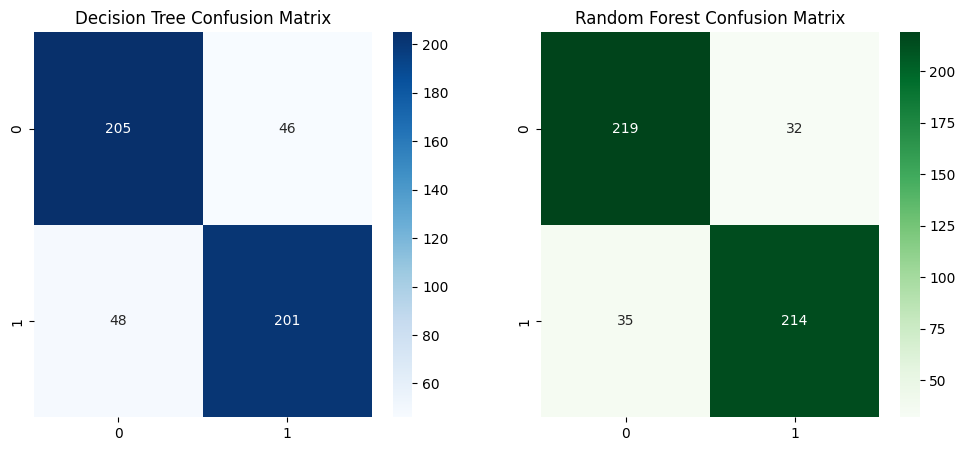

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from the .xlsx file
file_path = "pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx"  # Change this to your file location
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Encode categorical target variable if needed
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])  # Convert class labels to numerical format

# Define features and target variable
X = df.drop(columns=['Class'])  # Independent variables (features)
y = df['Class']  # Dependent variable (target)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nDecision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Print Classification Reports
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='d', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()
